In [1]:
import sklearn

In [2]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [3]:
from math import pi, sin, cos, pow
from random import random, uniform
import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

In [4]:
NSAMP = 10000
baseline = NSAMP*[0]
schedMax = 50
unschedMax = 30
unschedMin = 10
count = NSAMP*[0]
schedObsCount = NSAMP*[0]
unschedObsCount = NSAMP*[0]
totalObsCount = NSAMP*[0]
for i in range(1,NSAMP):
    count[i] = i
    baseline[i] = pow(cos(2*pi*i/1440),2.)
    schedObsCount[i] = int(schedMax*random()*baseline[i] + schedMax*random()) 
    unschedObsCount[i] = int(uniform(unschedMin, unschedMax))
    totalObsCount[i] = schedObsCount[i] + unschedObsCount[i]
    

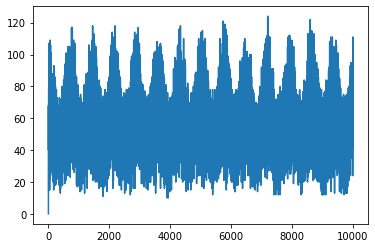

In [5]:
plt.plot(count,totalObsCount)

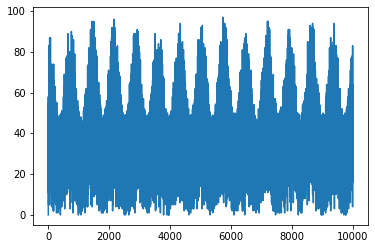

In [6]:
plt.plot(count,schedObsCount)


Let's insert some events into the data
1. Loss of data
2. All observations appear to be unscheduled
3. Less than expected scheduled and unscheduled observations

In [7]:
# From 2000 - 2050 zero out all observations
for i in range(2000,2050):
    schedObsCount[i] = 0
    unschedObsCount[i] = 0
    totalObsCount[i] = 0
    
# From 4000 - 4100 make all observations unscheduled
for i in range(4000,4100):
    schedObsCount[i] = 0
    unschedObsCount[i] = totalObsCount[i]

# From 6000 - 7000 reduce counts by 20%
for i in range(6000,7000):
    schedObsCount[i] = int(0.8*schedObsCount[i])
    unschedObsCount[i] = int(0.8*unschedObsCount[i])
    totalObsCount[i] = schedObsCount[i] + unschedObsCount[i]
        

In [8]:
# Get total number of scheduled and unscheduled observations
schedTotalObs = 0
unschedTotalObs = 0
for i in range(1,10000):
    schedTotalObs += schedObsCount[i]
    unschedTotalObs += unschedObsCount[i]

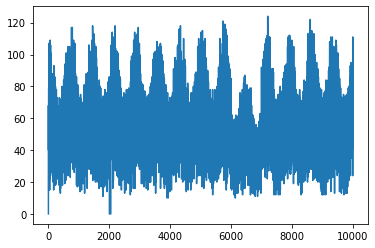

In [9]:
plt.plot(count,totalObsCount)

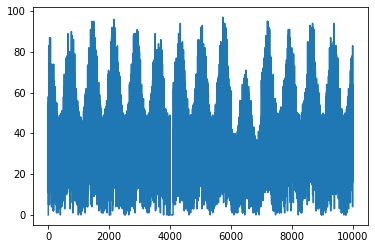

In [10]:
plt.plot(count,schedObsCount)

Read in the TLE file in CSV format

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
catalog = pd.read_csv('catalogTest.csv')


Generate orbital parameters for unscheduled objects and look for correlations

The orbital parameters of interest are
1. inclination (0 - 100 degrees)
2. right ascension of the ascending node (0-360 degrees)
3. period (60 - 90 minutes

In [12]:
NORBITS = 100
uctInclination = NORBITS*[0]
uctRightAscen = NORBITS*[0]
uctPeriod = NORBITS*[0] 

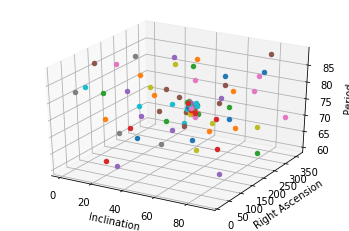

In [13]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,NORBITS):
    isBreakup = random()
    if(isBreakup < 0.5):
        uctInclination = uniform(0.,100.)
        uctRightAscen = uniform(0.,360.)
        uctPeriod = uniform(60.,90.)
    else:
        uctInclination = uniform(50.,57.)
        uctRightAscen = uniform(180.,193.)
        uctPeriod = uniform(74.,78.)
    ax.scatter(uctInclination, uctRightAscen, uctPeriod, marker='o')

ax.set_xlabel('Inclination')
ax.set_ylabel('Right Ascension')
ax.set_zlabel('Period')

plt.show()

In this simple case some of the observations cluster in a small area

When a cluster is detected it should produce an alert to the operators because it may indicate that an object has broken up

At what point should the operator be notified?  
Does it depend on some factors, like altitude or the density of operations objects in potentially close orbits?

In [ ]:
# For each unscheduled detection compare it's distance to the previously seen detections (both scheduled and unscheduled)
for i in range(0,nObservations):
    distances = checkDistance(obs[i],obs[0:i-1])
    
